<a href="https://colab.research.google.com/github/mattrosenblatt7/external_validation_review/blob/main/external_validation_review_figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

These figures are hypothetical examples (i.e., not real data) from the review paper "External validation improves generalizability, replicability, and reproducibility in neuroimaging predictive models"

In [3]:
import numpy as np
import pandas as pd
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_context('paper')

# Figure 4a: Improper hyperparameter search

Text(0.23, 4.1, 'validation')

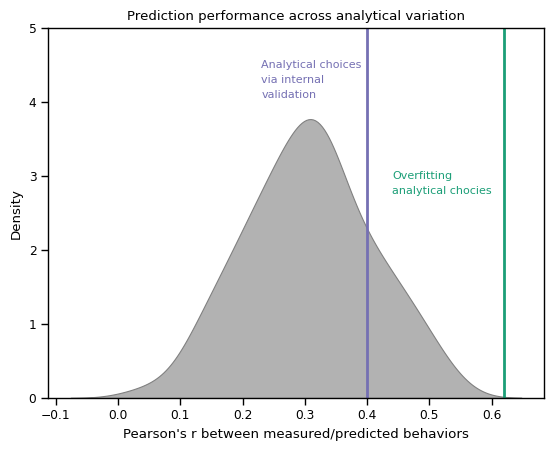

In [5]:
np.random.seed(0)

# fake data for performance across analytical variations
sns.kdeplot(.3+.1*np.random.randn(100),
            color='gray', alpha=.6, fill=True)
plt.ylim([0, 5])

plt.xlabel("Pearson's r between measured/predicted behaviors")
plt.ylabel('Density')
plt.title('Prediction performance across analytical variation')

# add text with line for overfitting analytical choices
plt.axvline(0.62, lw=2, color='#1b9e77')
plt.text(.44, 3, "Overfitting", ha='left', va='center', c='#1b9e77', fontsize=8)
plt.text(.44, 2.8, "analytical chocies", ha='left', va='center', c='#1b9e77', fontsize=8)

# add text with line for hyperparameters via internal validation
plt.axvline(0.4, lw=2, color='#7570b3')
plt.text(.23, 4.5, "Analytical choices", ha='left', va='center', c='#7570b3', fontsize=8)
plt.text(.23, 4.3, "via internal", ha='left', va='center', c='#7570b3', fontsize=8)
plt.text(.23, 4.1, "validation", ha='left', va='center', c='#7570b3', fontsize=8)

# Figure 4b: Simpson's paradox

0.03157772098029012
-0.03256663899317255


Text(0.5, 1.0, 'Inflation of prediction performance by pooling datasets')

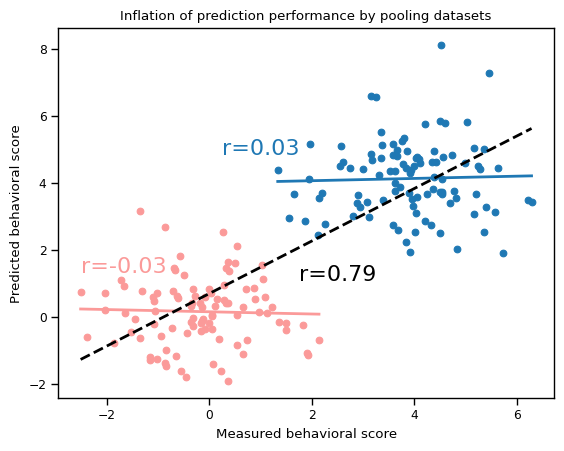

In [9]:
np.random.seed(2)
#### Dataset 1 simulation ####
x1 = np.random.randn(100) + 4
y1 = np.random.randn(100)  + 4

# fit model
m1 = scipy.stats.linregress(x1, y1)
x1_range = np.array([x1.min(), x1.max()])
y1_fit = x1_range*m1.slope + m1.intercept
print(m1.rvalue)

#### Dataset 2 simulation ####
x2 = np.random.randn(100-4)
y2 = np.random.randn(100-4)

# fit model
m2 = scipy.stats.linregress(x2, y2)
x2_range = np.array([x2.min(), x2.max()])
y2_fit = x2_range*m2.slope + m2.intercept
print(m2.rvalue)


#### Combined dataset simulation ####
m3 = scipy.stats.linregress(np.hstack((x1, x2)), np.hstack((y1, y2)))
x3_range = np.array([x2.min(), x1.max()])
y3_fit = x3_range*m3.slope + m3.intercept

# Plot
c = ['#1f78b4', '#fb9a99'] # ['#1b9e77', '#7570b3']
plt.scatter(x1, y1, c=c[0], label='Dataset 1')
plt.scatter(x2, y2, c=c[1], label='Dataset 2')
plt.plot(x1_range, y1_fit, c=c[0], lw=2)
plt.plot(x2_range, y2_fit, c=c[1], lw=2)
plt.plot(x3_range, y3_fit, c='black', lw=2, linestyle='--')
plt.xlabel('Measured behavioral score')
plt.ylabel('Predicted behavioral score')
plt.text(.25, 5, 'r={:.2f}'.format(m1.rvalue), ha='left', va='center', c=c[0], fontsize=16)
plt.text(-2.5, 1.5, 'r={:.2f}'.format(m2.rvalue), ha='left', va='center', c=c[1], fontsize=16)
plt.text(1.75, 1.25, 'r={:.2f}'.format(m3.rvalue), ha='left', va='center', c='black', fontsize=16)
plt.title('Inflation of prediction performance by pooling datasets')